## SP Lab Assignment 2: Time domain representation of LTI systems

Q.1.For the LTI systems described by the following difference equations, generate its impulse response, and unit step response. Comment on the properties of the system (Stable, Causal, ...)

 <ol>
  <li>$y[n] − 0.5y[n − 1] + 0.25y[n − 2] = 0.5x[n] + 0.2x[n − 1] + 0.2x[n − 2]$  </li>
 <li>$y[n] = 0.77y[n − 1] + x[n] + x[n − 1]$  </li>
  <li>$y[n] = 0.77y[n − 1] + 0.77x[n] + x[n − 1]$ </li>
</ol>

(use function <i>scipy.signal.impulse</i> to determine the impulse response and <i>scipy.signal.lfilter</i> to find the
output)

Details about <i>scipy.signal.impulse</i> can be found here, https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.signal.impulse.html#scipy.signal.impulse

Details about <i>scipy.signal.lfilter</i> can be found here, https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.signal.lfilter.html#scipy.signal.lfilter

In [0]:
#Write Code
import numpy as np 
import matplotlib.pyplot as plt
import scipy.signal as sig

system = ([1,-0.77],[1,1])
t, y = sig.impulse(system)
plt.stem(t,y)
plt.title('UNSTABLE')
plt.show()


Q.2.Plot the response of the following filters if the input is 
<ul>
  <li>$x[n] = 0.1n + sin(0.1nπ);    0 ≤ n ≤ 60 $  </li>
 <li>$ x[n] = 0.1n + sin(0.1nπ) + w[n];     0 ≤ n ≤ 60;$  </li> 
</ul> $w[n]$ is zero mean uniformly distributed random noise in $[−0.5\,\,  0.5]$.
<ol>
    <li> $y[n] = \frac{1}{4} \sum_{k=0}^3  x[n − k]$ </li>
    <li>$y[n] = \frac{2}{N(N+1)} \sum_{k=0}^{N−1}(N − k)x[n − k]; N = 4$ </li>
    <li>$y[n] − αy[n − 1] = (1 − α)x[n]; α = 3/4 $ </li>
</ol>
    
(use function <i>rand</i> to generate random noise)  https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.rand.html

 <i>uniform</i>  https://docs.scipy.org/doc/numpy-1.12.0/reference/generated/numpy.random.uniform.html

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


Text(0.5, 1.0, 'NOISY SIGNAL')

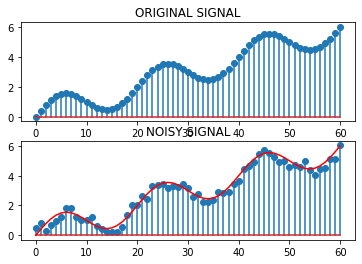

In [0]:
#Write Code
import numpy as np 
import matplotlib.pyplot as plt
import scipy.signal as sig

def signal7(a):
  return 0.1*a + np.sin(0.1*a*np.pi)

n = np.arange(0,61)
X = np.zeros(len(n))
X_noise = np.zeros(len(n))
for i in n:
  X[i] = signal7(n[i])

w = np.random.uniform(-0.5,0.5,61)

X_noise = X+ w
plt.subplot(2,1,1)
plt.stem(n, X)
plt.title('ORIGINAL SIGNAL')
plt.subplot(2,1,2)
plt.stem(n, X_noise)
plt.plot(n,X, 'r')
plt.title('NOISY SIGNAL')

# Finding the Y1


Q.3.Determine and plot the Linear convolution of the following sequences 
<ul>
(a)<li>$x[n] =[1, 1, 0, 1, 1]; -2 ≤ n ≤ 2 $  </li> and <li>$ h[n] =[1, -2, -3, 4];-3 ≤ n ≤ 0;$ </li> 
(b)<li>$x[n] = h[n]=a^nu[n],    0≤ n ≤ 29 $  and |a|>1 </li>  


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


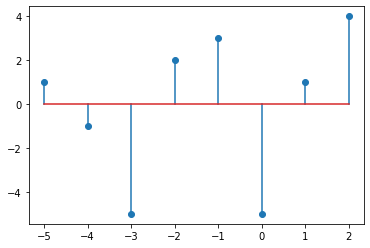

[ 1. -1. -5.  2.  3. -5.  1.  4.]
[ 1 -1 -5  2  3 -5  1  4]


In [0]:
#Write Code
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

X = np.array([1,1,0,1,1])
Y = np.array([1,-2,-3,4])

def C(X,Y,sx,sy):
    K=[]
    n = len(X)
    m = len(Y)
    A = np.append(X, np.zeros(m-1))
    # Step 1 Creation of List
    for j in range(m):
        for i in range(len(A)):
            K.append(A[i])
    # Insertion of Zeros at postions
    for j in range(m-1):
        K.insert((j+1)*(n+m-1),0.0)
        del K[len(K)-1]
    Arr = np.array(K).reshape(m,n+m-1)
    Ans = Y.dot(Arr)
    N = np.arange(sx+sy, sx+sy+n+m-1)
    return N, Ans

n, o = C(X,Y,-2,-3)
plt.stem(n,o)
plt.show()

o_fun = np.convolve(X,Y)

print(o)
print(o_fun)

In [0]:
#Write Code
import numpy as np
import matplotlib.pyplot as plt

def signal(n):
    return 1.5**n
n = np.arange(30)
h = np.zeros(len(n))
for i in n:
    h[i] = signal(n[i])

N_code, O_code = C(h,h,0,0)
O_lib = np.convolve(h,h)
plt.subplot(2,1,1)
plt.stem(N_code, O_code)
plt.subplot(2,1,2)
plt.stem(N_code, O_lib)
plt.show()

Q.4.Determine and plot the auto-correlation and Cross correlation of the following sequences 
<ul>
<li>$x[n] =[1, 4, 1, 3];-2≤n≤1 $ </li> and <li>$ y[n] =[1, 2, 1, 4];-3 ≤ n ≤ 0;$ </li> 
 


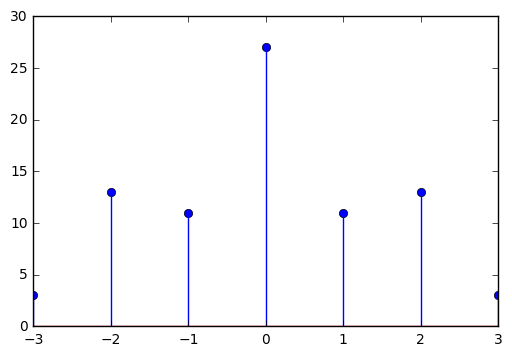

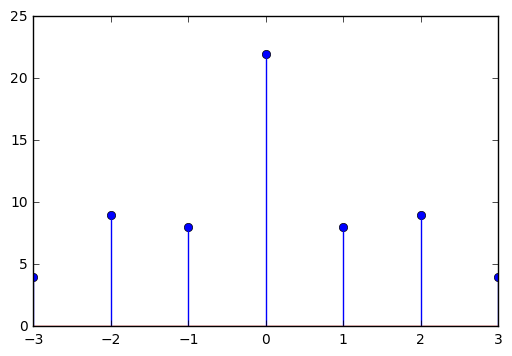

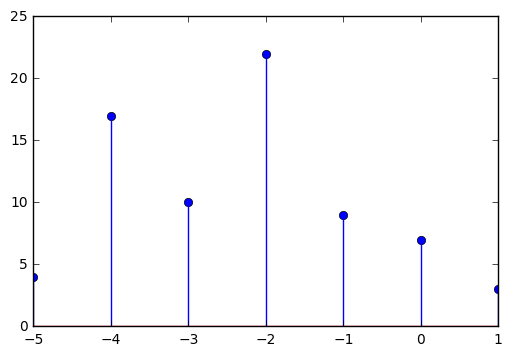

In [0]:
#Write Code
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
X = np.array([1,4,1,3])
Y = np.array([1,2,1,4])

X_auto = sig.correlate(X,X)
Y_auto = sig.correlate(Y,Y)
XY_Corr = sig.correlate(X,Y)

nx = np.arange(-3,-3+7)
plt.stem(nx, X_auto)
plt.show()
ny  = np.arange(-3,-3+7)
plt.stem(nx, Y_auto)
plt.show()
nxy = np.arange(-5,-5+7)
plt.stem(nxy, XY_Corr)
plt.show()

Q.5.Generate the signal $x[n] = sin(0.1πn);0 ≤ n ≤99$. Add uniform random
noise (with amplitude 1 and mean 0) to obtain a noisy signal $s[n]$. Plot
each signal and check if you can identify any periodicity in the waveforms.
<ol>
    <li> Obtain the autocorrelation r[n] of s[n] and plot. Identify the period N of the autocorrelation signal. Relate with the period of x[n].</li>
    <li> Generate a impulse train $i[n] = \sum_{k} δ[n−kN];0 ≤ n ≤ 99$. Find the cross correlation y[n] of s[n] and i[n]. Choose a normalising factor such that the peak value of y[n] is 1.
</ol>
        

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:23: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning 

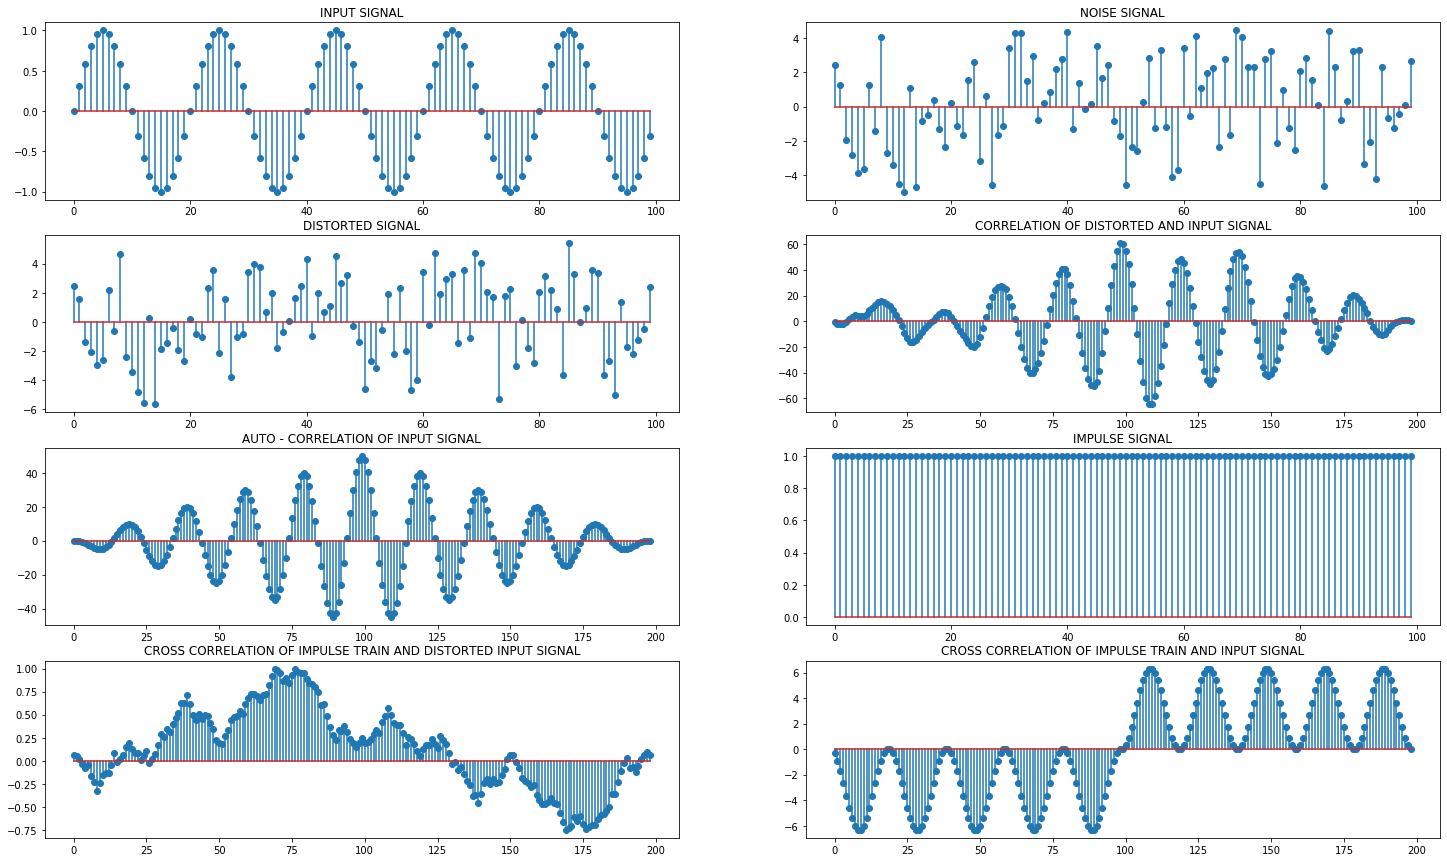

In [0]:
#Write Code
import numpy as np
import matplotlib.pyplot as plt

def signal3(a):
    return np.sin(0.1*np.pi*a)
n = np.arange(0,100)
x = np.zeros(len(n))
r = np.zeros(len(n))
noisy_signal = np.zeros(len(n))
for i in n:
    x[i] = signal3(n[i])

r = np.random.uniform(-5,5,100)


plt.figure(figsize=(25,15))
noisy_signal = x+r

plt.subplot(4,2,1)
plt.stem(n,x)
plt.title('INPUT SIGNAL')
plt.subplot(4,2,2)
plt.stem(n,r)
plt.title('NOISE SIGNAL')
plt.subplot(4,2,3)
plt.stem(n,noisy_signal)
plt.title('DISTORTED SIGNAL')


output = sig.correlate(noisy_signal, x)
X_aut = sig.correlate(x, x)
plt.figure
plt.subplot(4,2,4)
plt.stem(output)
plt.title('CORRELATION OF DISTORTED AND INPUT SIGNAL')
plt.subplot(4,2,5)
plt.stem(X_aut)
plt.title('AUTO - CORRELATION OF INPUT SIGNAL')


# Generation of Impulse
def signal6(a):
  if(a>=0 and a<100):
    return 1
  else:
    return 0
n_imp = np.arange(0,100)
delta = np.zeros(len(n_imp))
for i in n:
  delta[i] = signal6(n[i])
plt.subplot(4,2,6)
plt.stem(n_imp, delta)
plt.title('IMPULSE SIGNAL')
output2 = sig.correlate(delta, noisy_signal)

Norm = output2.max()
output2 = output2/Norm
plt.subplot(4,2,7)
plt.stem(output2)
plt.title('CROSS CORRELATION OF IMPULSE TRAIN AND DISTORTED INPUT SIGNAL')


output3 = sig.correlate(delta, x)

Norm = output2.max()
output3 = output3/Norm
plt.subplot(4,2,8)
plt.stem(output3)
plt.title('CROSS CORRELATION OF IMPULSE TRAIN AND INPUT SIGNAL')
plt.show()



Q.6.Consider a round theatre where an orchestra is in the middle of two concentric circles and the walls on one half side are at a radial distances of $17.15m$ (inner circle) and $34.3m$ (outer circle) on the other side from the
orchestra. The speed of sound is $343 m/s$. Assume that the recorded signal is the sum of the original signal and the attenuated echoes from the two walls and is given by $r[n] = y[n] + 0.8y[n − N1] + 0.6y[n − N2]$ where,
$N1$ is the delay caused by the closest wall and N2 is the delay caused by the farther wall. The recorder is in the centre of the theatre. Take any audio signal available and generate $r[n]$ and listen to both the original and
the echoed signal.

In [0]:
#Write Code
import numpy as np 
import matplotlib.pyplot as plt
import scipy.signal as sig
import scipy.io.wavfile as wav
from scipy.fftpack import fft

# Calculating the Values of N1 and N2
N1 = 17.15/343
N2 = 34.3/343

# Importing the WAV File recorded at Fs Sampling Frequency
Fs=1

# Making them Intergers by multiplying the same amount say SAMPLING FREQUENCY
N1*=Fs
N2*=Fs

rate,data = wav.read('keyttu.wav');

data
